# Dimensionality reduction by Principal Component Analysis (PCA) on MNIST dataset (from scratch)

In [173]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [176]:
#load the dataset
data = pd.read_csv('mnist_train.csv',header=None)

In [177]:
data.shape

(60000, 785)

In [178]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


60000 data points are available and 785 column in which 1 column is of label (0-9) and the rest 784 (28x28) pixel matrix

In [179]:
#labels are kept in a different series (1D)
labels=data[0]
labels.shape

(60000,)

In [180]:
#all the rest features (784) are kept in features dataframe 
features=data.drop(columns=[0])
type(features)

pandas.core.frame.DataFrame

In [181]:
features.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


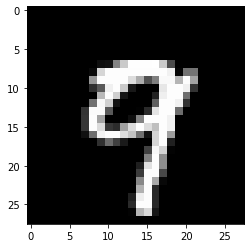

In [182]:
#visualize the image of one datapoint(784 features)

#indx can vary from 0 to 59999 (60k values) i.e. rows in the features dataframe
indx=7890

#convert the vector of 784 into matrix of (28,28) for visualizing in the form of image
matrix_conv=features.iloc[indx].to_numpy().reshape(28,28)
plt.imshow(matrix_conv,cmap='gray')
plt.show()

In [183]:
#PCA to reduce the dimension from 784 to 2 for visualization purpose
#first standardize the features usign StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standardize_data=sc.fit_transform(features)
standardize_data.shape

(60000, 784)

In [184]:
#calcualte the covariance matrix which will be used in calculating the eigen values and vectors
#1/n(X'X)  this is the formula for covariance matrix when X is column standardized

#here we use 1/n becuase we are using population. If we are using sample from the population, we will be using 1/n-1 in
#the covariance matrix formula
#covariance matrix will be of shape (784x784). a square symmetric matrix
cov_matrix=(np.dot(standardize_data.T,standardize_data))/standardize_data.shape[0]
cov_matrix.shape

(784, 784)

In [185]:
#for visualization purpose,we will only use the largest 2 eigen vectors
import scipy
from scipy.linalg import eigh

values,vectors = eigh(cov_matrix,eigvals=(782,783))
#data is from 0 to 783
#we use the last 2 values because eigh caclulates the eigen values in ascending order (maximum will be at the end)
#782 vector will be the 2nd principal component while 783rd vector is the 1st principal component because 783rd eigen value is the maximum
vectors.shape

(784, 2)

In [186]:
# to calculate new coordinates, we have to project the data points onto eigen vectors (here 2)
# vectors are of shape (784,2) and standardize_data is of shape (60000,784)
new_coordinates=np.dot(vectors.T,standardize_data.T)
#we have projected the data and got the shape of (2,60000)
new_coordinates.shape

(2, 60000)

In [187]:
#add the labels to the new_coordiantes using vertical stack
new_coordinates=np.vstack((new_coordinates,labels)).T

In [189]:
new_coordinates.shape

(60000, 3)

In [190]:
#creating a dataframe
df=pd.DataFrame(data=new_coordinates,columns=('2nd Principal', '1st Principal', 'labels'))
print(df.head())

   2nd Principal  1st Principal  labels
0      -4.814790      -0.922159     5.0
1      -7.754403       8.708977     0.0
2       9.431338       2.328389     4.0
3      -3.746318      -6.582173     1.0
4       3.133297      -5.183251     9.0


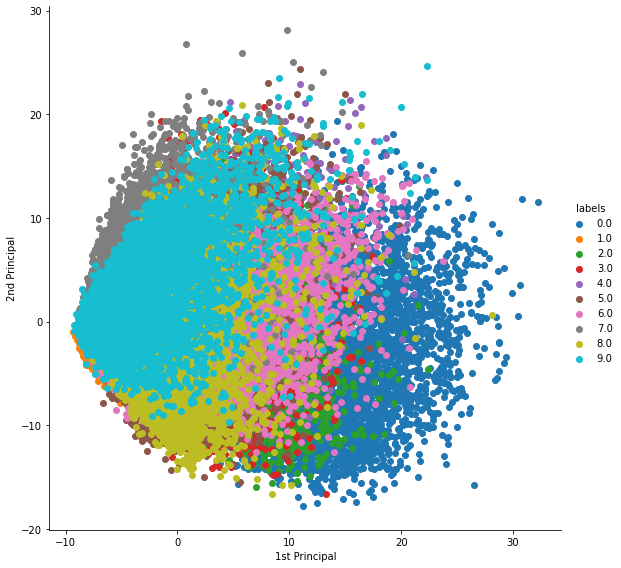

In [191]:
sns.FacetGrid(df,hue='labels',height=8)\
    .map(plt.scatter,'1st Principal', '2nd Principal')\
    .add_legend()
plt.show()

HERE, 784 dimensional data is reduced to 2 dimension using Principal component analysis (PCA) for visualization purpose
OBSERVATION:
Data is not well separated (overlappind data)